In [8]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2
#%matplotlib qt

In [1]:
from skdim import global_id
from skdim import local_id
import skdim
import multiprocessing as mp
import scipy
import numpy as np
import pandas as pd
import rpy2
import rpy2.robjects as ro
import rpy2.robjects.numpy2ri
import rpy2.robjects.packages as rpackages

from sklearn.neighbors import NearestNeighbors
import sklearn.datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

rpy2.robjects.numpy2ri.activate()
utils = rpackages.importr('utils')
#utils.install_packages('intrinsicDimension')
#utils.install_packages('ider')
intdimr = rpackages.importr('intrinsicDimension')
ider   = rpackages.importr('ider')
#r_base = rpackages.importr('base')

In [213]:
%%R -i n
sorted = FALSE
line <- cbind(rep(0, 5 * n), rep(0, 5 * n), stats::runif(5 * 
    n, -0.5, 0))
disc <- cbind(matrix(stats::runif(26 * n, -1, 1), ncol = 2), 
    rep(0, n))
disc <- disc[-which(sqrt(rowSums(disc^2)) > 1), ]
disc <- disc[, c(1, 3, 2)]
disc[, 3] <- disc[, 3] - min(disc[, 3]) + max(line[, 
    3])
fb <- matrix(stats::runif(30 * n * 10, -0.5, 0.5), ncol = 3)
rmID <- which(sqrt(rowSums(fb^2)) > 0.5)
if (length(rmID) > 0) {
    fb <- fb[-which(sqrt(rowSums(fb^2)) > 0.5), ]
}
fb <- cbind(fb[, 1:2], fb[, 3] + 0.5)
fb[, 3] <- fb[, 3] - min(fb[, 3]) + max(disc[, 3])
if (sorted) {
    fb <- fb[order(fb[, 3]), ]
}
line2 <- cbind(rep(0, 5 * n), rep(0, 5 * n), stats::runif(5 * 
    n, -0.5, 0))
line2[, 3] <- line2[, 3] - min(line2[, 3]) + max(fb[, 
    3])
lineID <- rep(1, dim(line)[1])
discID <- rep(2, dim(disc)[1])
fbID <- rep(3, dim(fb)[1])
line2ID <- rep(1, dim(line2)[1])
x <- rbind(line, disc, fb, line2)
useID <- sort(sample(1:dim(x)[1], n))
x <- x[useID, ]

[1] 500   3


In [205]:
%%R
length(rowSums(disc))

[1] 1035


In [217]:
_sorted=False

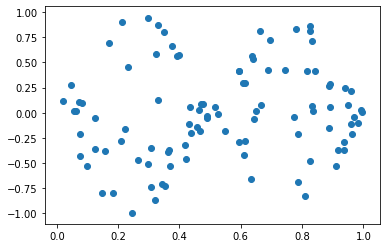

In [178]:
x=hyperTwinPeaks(100)

plt.scatter(*x[:,1:].T)

In [155]:
npoints=5000
#n_neighbors=100
#n_cores=1

#R datasets
sShape=np.array(ider.gendata(DataName='SShape',n=npoints))
twinPeaks=np.array(intdim.twinPeaks(Ns=npoints))
swissRoll3Sph=np.array(intdim.swissRoll3Sph(Ns=npoints,Nsph=npoints))
ldbl=np.array(ider.gendata(DataName='ldbl',n=npoints)[0]) 

#global ID
res_sShape = SeparabilityAnalysis(sShape,ProducePlots=0,ConditionalNumber=np.inf)
res_twinPeaks = SeparabilityAnalysis(twinPeaks,ProducePlots=0,ConditionalNumber=np.inf)
res_swissRoll3Sph = SeparabilityAnalysis(swissRoll3Sph,ProducePlots=0,ConditionalNumber=np.inf)
res_ldbl = SeparabilityAnalysis(ldbl,ProducePlots=0,ConditionalNumber=np.inf)
for res in [res_sShape,res_twinPeaks,res_swissRoll3Sph,res_ldbl]:
    print('estimated global id :',round(res[1][0],2))
glob_id_ests = [res_sShape,res_twinPeaks,res_swissRoll3Sph,res_ldbl]

#inseparability
palphas = []
for i in range(4):
    n_alpha = glob_id_ests[i][0]
    n_single = glob_id_ests[i][1]
    p_alpha = glob_id_ests[i][2]
    alpha_index = (n_alpha==n_single).tolist().index(True)
    palpha_selected = p_alpha[alpha_index,:]
    palphas.append(palpha_selected)

#pointwise ID
pw_res_sShape = asPointwise(data=sShape,
                            function=SeparabilityAnalysis,
                            params=dict(ProducePlots=0,ConditionalNumber=np.inf),
                            n_neighbors=n_neighbors,
                            n_cores=n_cores)
pw_res_twinPeaks = asPointwise(data=twinPeaks,
                            function=SeparabilityAnalysis,
                            params=dict(ProducePlots=0,ConditionalNumber=np.inf),
                            n_neighbors=n_neighbors,
                            n_cores=n_cores)
pw_res_swissRoll3Sph = asPointwise(data=swissRoll3Sph,
                            function=SeparabilityAnalysis,
                            params=dict(ProducePlots=0,ConditionalNumber=np.inf),
                            n_neighbors=n_neighbors,
                            n_cores=n_cores)
pw_res_ldbl = asPointwise(data=ldbl,
                            function=SeparabilityAnalysis,
                            params=dict(ProducePlots=0,ConditionalNumber=np.inf),
                            n_neighbors=n_neighbors,
                            n_cores=n_cores)
pw_id_ests = [pw_res_sShape,pw_res_twinPeaks,pw_res_swissRoll3Sph,pw_res_ldbl]

Signature:       intdimr.twinPeaks(*args, **kwargs)
Type:            DocumentedSTFunction
String form:    
function (Ns, h = 1) 
hyperTwinPeaks(Ns, 2, h)
<bytecode: 0x55ce52832d80>
<environment: namespace:intrinsicDimension>
File:            ~/.local/lib/python3.7/site-packages/rpy2/robjects/functions.py
Docstring:      
Python representation of an R function.
description
-----------


 Generates data points from a two- or higher-dimensional Twin Peaks manifold.
 


twinPeaks(
    Ns,
    h = 1.0,
)

Ns :   number of data points.  ,

n :   dimension of the (hyper) plane from which the peaks stand out. For            `twinPeaks` `n` is 2.  ,

h :   height of the peaks.  ,
Class docstring:
Python representation of an R function, where
the names in named argument are translated to valid
argument names in Python. 


In [153]:
def randsphere(npoints, ndim=3):
    """
    Generates a sample from a uniform distribution on an hypersphere surface
    """
    vec = np.random.randn(npoints, ndim)
    vec /= np.linalg.norm(vec, axis=1)[:,None]
    return vec

def hyperTwinPeaks(Ns, n = 2, h = 1):
    """ 
    Translated from Kerstin Johnsson's R package intrinsicDimension
    """
    base_coord = np.random.uniform(size=(Ns, n))
    height = h * np.prod(np.sin(2 * np.pi * base_coord),axis=1,keepdims=1)
    return np.hstack((base_coord, height))

def swissRoll3Sph(Ns, Nsph, a = 1, b = 2, nturn = 1.5, h = 4):
    '''
    Generates a sample from a uniform distribution on a Swiss roll-surface, 
    possibly together with a sample from a uniform distribution on a 3-sphere
    inside the Swiss roll. Translated from Kerstin Johnsson's R package intrinsicDimension

    Parameters
    ----------

    Ns : int 
        Number of data points on the Swiss roll.

    Nsph : int
        Number of data points on the 3-sphere.

    a : int or float, default=1
        Minimal radius of Swiss roll and radius of 3-sphere.

    b : int or float, default=2
        Maximal radius of Swiss roll.

    nturn : int or float, default=1.5
        Number of turns of the surface. 

    h : int or float, default=4
        Height of Swiss roll.

    Returns
    -------
    
    np.array, (npoints x ndim)
    '''
    
    if Ns > 0:
        omega = 2 * np.pi * nturn
        dl = lambda r: np.sqrt(b**2 + omega**2 * (a + b * r)**2)
        ok = np.zeros(1)
        while sum(ok) < Ns:
            r_samp = np.random.uniform(size = 3 * Ns)
            ok = np.random.uniform(size = 3 * Ns) < dl(r_samp)/dl(1)

        r_samp = r_samp[ok][:Ns]
        x = (a + b * r_samp) * np.cos(omega * r_samp)
        y = (a + b * r_samp) * np.sin(omega * r_samp)
        z = np.random.uniform(-h, h, size = Ns)
        w = np.zeros(Ns)

    else:
        x = y = z = w = np.array([])

    if Nsph > 0:
        sph = randsphere(Nsph, 4) * a
        x = np.concatenate((x, sph[:, 0]))
        y = np.concatenate((y, sph[:, 1]))
        z = np.concatenate((z, sph[:, 2]))
        w = np.concatenate((w, sph[:, 3]))
    
    return np.hstack((x[:,None], y[:,None], z[:,None], w[:,None]))

def ldbl(n):
    line = np.hstack((np.repeat(0, 5 * n)[:,None], np.repeat(0, 5 * n)[:,None], np.random.uniform(-0.5, 0,size=5 * n)[:,None]))
    disc = np.hstack((np.random.uniform(-1, 1,(13 * n,2)), np.zeros(13 * n)[:,None]))
    disc = disc[~(np.sqrt(np.sum(disc**2,axis=1)) > 1),:]
    disc = disc[:, [0, 2, 1]]
    disc[:, 2] = disc[:, 2] - min(disc[:, 2]) + max(line[:, 2])

    fb = np.random.uniform(-0.5, 0.5,size=(n * 100,3))
    rmID = np.where(np.sqrt(np.sum(fb**2,axis=1)) > 0.5)[0]

    if len(rmID) > 0:
        fb = fb[~(np.sqrt(np.sum(fb**2,axis=1)) > 0.5),:]

    fb = np.hstack((fb[:,:2], fb[:, [2]] + 0.5))
    fb[:, 2] = fb[:, 2] - min(fb[:, 2]) + max(disc[:, 2])

    if _sorted:
        fb = fb[order(fb[:, 2]),:]

    line2 = np.hstack((np.repeat(0, 5 * n)[:,None], np.repeat(0, 5 * n)[:,None], np.random.uniform(-0.5, 0,size=5 * n)[:,None]))
    line2[:, 2] = line2[:, 2] - min(line2[:, 2]) + max(fb[:, 2])
    lineID = np.repeat(1, len(line))
    discID = np.repeat(2, len(disc))
    fbID = np.repeat(3, len(fb))
    line2ID = np.repeat(1, len(line2))
    x = np.vstack((line, disc, fb, line2))
    useID = np.sort(np.random.choice(len(x), n,replace=False))
    x = x[useID,:]

    return x, np.concatenate((lineID, discID, fbID, line2ID),axis=0)[useID]

In [115]:
data = np.zeros((30,10))
data[:,:5] = skdim.randball(n_points = 30, n_dim = 5, radius = 1, random_state = 0)

In [3]:
ider.mada?

Signature:       ider.mada(*args, **kwargs)
Type:            DocumentedSTFunction
String form:    
function (x, k = NULL, comb = "average", DM = FALSE, local = FALSE,
           maxDim = 5)
           {
           if (i <...> (table(ests))))
           }
           return(est)
           }
           <bytecode: 0x55ff86bcfe48>
           <environment: namespace:ider>
           
File:            ~/.local/lib/python3.7/site-packages/rpy2/robjects/functions.py
Docstring:      
Python representation of an R function.
description
-----------


 mada  estimates local information dimension of given dataset based on 
 the first order expansion of probability mass function.
 


mada(
    x,
    k = rinterface.NULL,
    comb = average,
    DM = False,
    local = False,
    maxDim = 5.0,
)

x :  data matrix or distance matrix given by as.matrix(dist(x)). ,

k :  k-NN parameter. ,

comb :  'average', 'median' or 'vote' for combining local estimates when global estimate is required. ,

DM :  whet